**Credit:** 
* https://www.youtube.com/watch?v=MSBY28IJ47U&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=19
* https://www.simplilearn.com/tutorials/machine-learning-tutorial/machine-learning-steps
* https://wandb.ai/ayush-thakur/keras-dense/reports/Keras-Dense-Layer-How-to-Use-It-Correctly--Vmlldzo0MjAzNDY1
* https://neptune.ai/blog/saving-trained-model-in-python

# Dataset loading, parsing and exploartion
Loading the reliable data so that my machine learning model can find the correct patterns. The quality of the data that you feed to the machine will determine how accurate your model is. If you have incorrect or outdated data, you will have wrong outcomes or predictions which are not relevant.

In [1]:
import pandas as pd

# loading the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# checking the matrix of dataset
# rows=7043, column=21
df.shape

(7043, 21)

# Cleaning and correcting the dataset
Cleaning the data to remove unwanted data, missing values, rows, and columns, duplicate values, data type conversion, etc. And then restructuring the dataset by changing the rows and columns

In [3]:
# droping "customerID" column, since it is not making any impact or sense here.
df.drop(['customerID'], axis='columns', inplace=True)
# df.head()

In [4]:
# cheking the data types of all the features of columns in dataset.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# "TotalCharges", data type is 'object' but the datavalues should be numeric, so need to explore and correct it.
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
* If ‘raise’, then invalid parsing will raise an exception.
* If **‘coerce’**, then **invalid parsing will be set as NaN.**
* If ‘ignore’, then invalid parsing will return the input.

In [6]:
# changing string data to numeric from column "TotalCharges"
# errors='coerce' will set the invalid parsing as NaN.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [7]:
# checking the number of rows, which become null due to above action.
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### subset : *column label or sequence of labels, optional*
Labels along other axis to consider, e.g. if you are dropping rows these would be a **list of columns to include.**

In [8]:
# since the number of rows with "NaN" value is very less in number i.e. only 11 rows, 
# so removing all the rows from all the columns.
df.dropna(subset=['TotalCharges'], inplace=True)

In [9]:
# size of the matrix reduced from rows=7043, column=21 to
# rows=7032, column=20
df.shape

(7032, 20)

In [10]:
# now the data types of "TotalCharges" column change to 'float64', which is acceptable
df.TotalCharges.dtypes

dtype('float64')

# Preparing the data for visulization
To understand how it is structured and the relationship between various variables and classes present in it.

* ploting histogram with number of customer not leaving as per tenure
* ploting histogram with number of customer not leaving as per monthly charges
* ploting histogram with number of customer not leaving as per total charges

In [11]:
import matplotlib.pyplot as plt

In [12]:
# number of customer not leaving as per tenure
tenure_leave_no = df[df.Churn=='No'].tenure
# tenure_leave_no.shape

In [13]:
# number of customer leaving as per tenure
tenure_leave_yes = df[df.Churn=='Yes'].tenure
# tenure_leave_yes.shape

#### x : (n,) array or sequence of (n,) arrays
* Input data. The histogram is computed over the flattened array.
* Input values, this takes either a single array or a sequence of arrays which are not required to be of the same length.

#### rwidth : float or None, default: None
* The relative width of the bars as a fraction of the bin width. If None, automatically compute the width.
* Ignored if histtype is 'step' or 'stepfilled'.

#### histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
The type of histogram to draw.
* 'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
* 'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
* 'step' generates a lineplot that is by default unfilled.
* 'stepfilled' generates a lineplot that is by default filled.

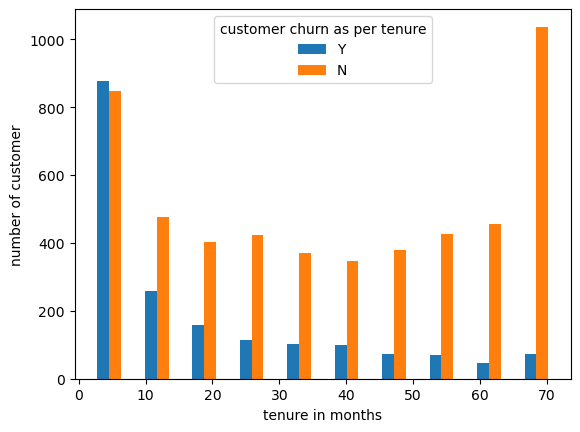

In [14]:
# rwidth (float[0 to 1]), default: None The relative width of the bars as a fraction of the bin width
bars=plt.hist([tenure_leave_yes, tenure_leave_no],rwidth=0.5,histtype='bar',)
plt.xlabel('tenure in months')
plt.ylabel('number of customer')
plt.legend('YN',title='customer churn as per tenure')
# bars

In [15]:
# customer not leaving as per monthly charges
monthly_leave_no = df[df.Churn=='No'].MonthlyCharges

In [16]:
# customer leaving as per monthly charges
monthly_leave_yes = df[df.Churn=='Yes'].MonthlyCharges

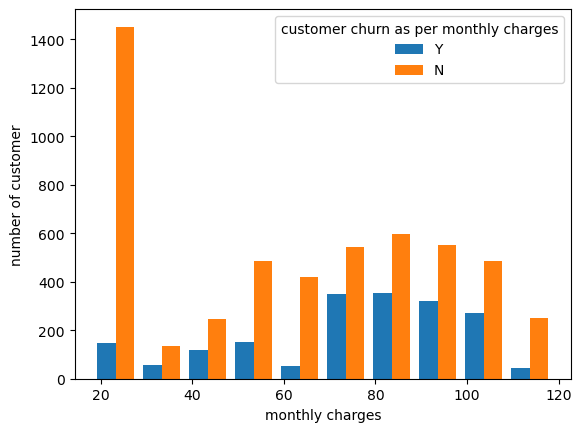

In [17]:
# histogram is computed over the flattened array[first,second,...]
bars=plt.hist([monthly_leave_yes, monthly_leave_no])
plt.xlabel('monthly charges')
plt.ylabel('number of customer')
plt.legend('YN',title='customer churn as per monthly charges')
# bars

In [18]:
# customer not leaving as per total charges
total_leave_no = df[df.Churn=='No'].TotalCharges

In [19]:
# customer leaving as per total charges
total_leave_yes = df[df.Churn=='Yes'].TotalCharges

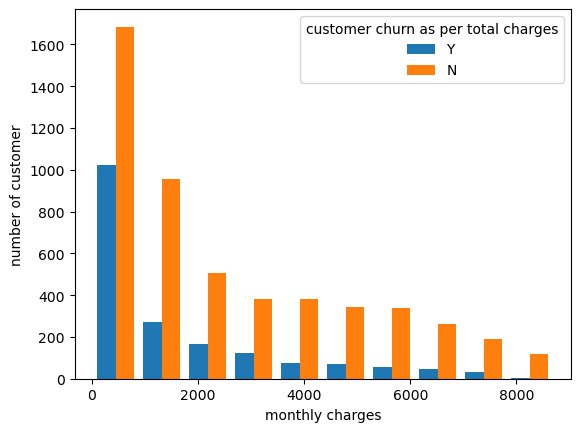

In [20]:
# histogram is computed over the flattened array[first,second,...]
bars=plt.hist([total_leave_yes, total_leave_no])
plt.xlabel('monthly charges')
plt.ylabel('number of customer')
plt.legend('YN',title='customer churn as per total charges')
# bars

## Preparing the data as per ML requirement, means converting all the strings into numeric values

In [21]:
yes_no_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'No phone service':0, 'Yes':1, 'No':0, 'No internet service':0, 'Female':0, 'Male':1},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Exploring and checking the unique content of each left out specific dataset 

In [22]:
# check the unique contents of each column
str_col = ['InternetService','Contract','PaymentMethod']
for str_col in df:
    if df[str_col].dtypes=='object':
        print(f'{str_col}:'.ljust(20,'.'), df[str_col].unique())

InternetService:.... ['DSL' 'Fiber optic' 'No']
Contract:........... ['Month-to-month' 'One year' 'Two year']
PaymentMethod:...... ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Converting categorical variable of each column into dummy variables.
Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

**columns : list-like, default None**
* Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.

In [23]:
# get_dummies with columns names in the DataFrame to be encoded.
df1 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
# df1.head()

In [24]:
df1.dtypes
# df1.columns

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
# size of the matrix increased wrt column=21 to column=27
df1.shape

(7032, 27)

### Transforming features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [26]:
from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])
df1.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3327,1,0,1,0,0.915493,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2375,0,1,1,0,0.985915,1,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0
6173,1,1,0,0,0.478873,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1851,0,0,1,0,0.014085,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5966,1,0,1,0,0.577465,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1329,0,0,1,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
734,0,0,1,0,0.366197,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
2292,0,0,1,1,0.746479,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [27]:
for col in df1:
    print(f'{col}: '.ljust(25,'.'),df1[col].unique())

gender: ................. [0 1]
SeniorCitizen: .......... [0 1]
Partner: ................ [1 0]
Dependents: ............. [0 1]
tenure: ................. [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: ........... [0 1]
MultipleLin

## Splitting the cleaned data into two sets - a training set and a testing set. 
The training set is the set your model learns from. A testing set is used to check the accuracy of your model after training.

In [28]:
# dropping a output or dependent column from all the inputs.
X = df1.drop(['Churn'], axis='columns')
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [29]:
y = df1.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

### Spliting an arrays or matrices into random train and test subsets.
**test_size : float or int, default=None**
* If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
* If int, represents the absolute number of test samples. 
* If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

**random_state : int, RandomState instance or None, default=None**
* Controls the shuffling applied to the data before applying the split. **Pass an int** for reproducible output across multiple function calls. See [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state.)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

# Choosing a Model
A machine learning model determines the output you get after running a machine learning algorithm on the collected data. It is important to choose a model which is relevant to the task at hand. So choose your model accordingly which is best is suited for numerical or categorical data.

Choosing a **Sequential model** which is appropriate for a **plain stack of layers**, where each layer has **exactly one input tensor and one output tensor.**

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## sklearn.preprocessing.StandardScaler
Standardize features by removing the mean and scaling to unit variance.<br>
The standard score of a sample x is calculated as:

**z = (x - u) / s**

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.<br><br>
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.<br><br>
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

**fit_transform(X[, y]):** Fit to data, then transform it.<br>
**X : array-like of shape (n_samples, n_features)**
Input samples.

**y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None**<br>
Target values (None for unsupervised transformations).


In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.fit_transform(X_test)

## Build a model ANN in tensorflow
### Desnse layer, a fully connected layer connects every input feature to every neuron in that layer
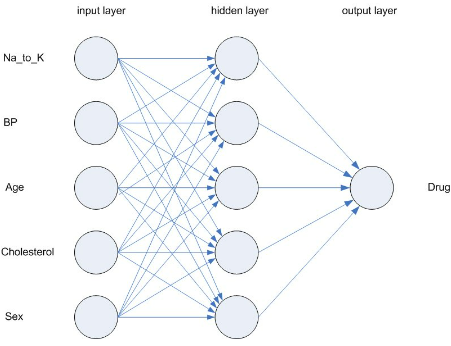

**input_shape:** 
* Layer to be used as an entry point into a Network (a graph of layers).
* This is to create an input layer to insert before the current layer. This can be treated equivalent to explicitly defining an **InputLayer**.

**ReLU Function:** Rectified Linear Unit. 
* Although it gives an impression of a linear function, ReLU has a derivative function and allows for backpropagation while simultaneously making it computationally efficient. 
* The ReLU function does not activate all the neurons at the same time. 
* The neurons will only be deactivated if the output of the linear transformation is less than 0.
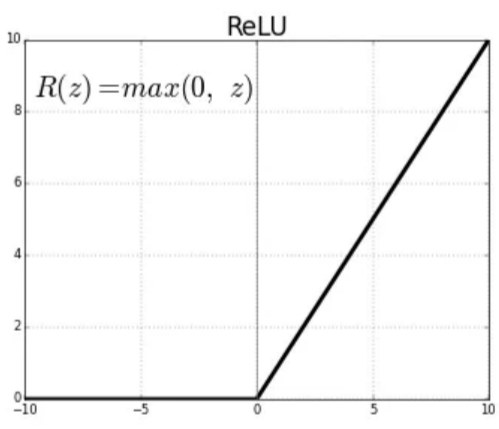

**sigmoid**:
* This function takes any real value as input and outputs values in the range of 0 to 1. 
* The larger the input (more positive), the closer the output value will be to 1.0, whereas 
* the smaller the input (more negative), the closer the output will be to 0.0, as shown below.
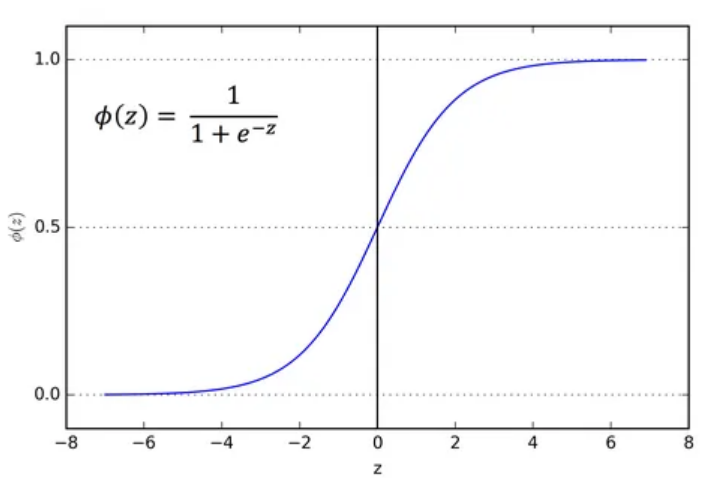

**model.compile:**
Configures the model for training

**optimizer='adam':**
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**loss='binary_crossentropy':**
use this for binary (0 or 1) classification applications. The loss function requires the following inputs:

* y_true (true label): This is either 0 or 1.
* y_pred (predicted value): This is the model's prediction, i.e, a single floating-point value which either represents a [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf] when from_logits=True) or a probability (i.e, value in [0., 1.] when from_logits=False).

**metrics=['accuracy']:**
* This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy: an idempotent operation that simply divides total by count.

In [33]:
model = keras.Sequential(
    [
        layers.Dense(26, input_shape=(26,), activation='relu'),
        layers.Dense(15, activation='relu'),
        layers.Dense(1, activation='sigmoid')])

# Configures the model for training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7223
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7940
Epoch 3/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8016
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8041
Epoch 5/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8071


In [34]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7868


[0.44939368963241577, 0.7867803573608398]

In [35]:
y_pred = model.predict(X_test)
y_pred[0:5]

44/44 [==============================] - 0s 1ms/step


array([[0.13850635],
       [0.31241193],
       [0.0159873 ],
       [0.7773611 ],
       [0.3358208 ]], dtype=float32)

In [36]:
y_pred_new = []
for data in y_pred:
    if data > 0.5:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
y_pred_new[0:5]

[0, 0, 0, 1, 0]

In [37]:
y_test[0:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

# Classification report to get the precision, recal and f1-score information
**y_true :** 1d array-like, or label indicator array / sparse matrix
* Ground truth (correct) target values.

**y_pred :** 1d array-like, or label indicator array / sparse matrix
* Estimated targets as returned by a classifier.

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_pred_new,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85       999
     class 1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



### Compute confusion matrix to evaluate the accuracy of a classification.

**y_true : array-like of shape (n_samples,)**<br>
Ground truth (correct) target values.

**y_pred : array-like of shape (n_samples,)**<br>
Estimated targets as returned by a classifier.

In [39]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred_new)
cm

array([[883, 116],
       [184, 224]], dtype=int64)

### Ploting a rectangular data as a color-encoded matrix.
This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument.<br>

**data : rectangular dataset**<br>
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.<br>
**annot : bool or rectangular dataset, optional**<br>
If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.<br>
**fmt : str, optional**<br>
String formatting code to use when adding annotations.

Text(50.722222222222214, 0.5, 'Truth')

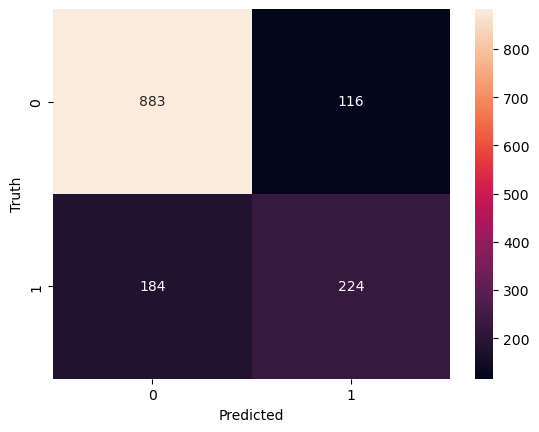

In [40]:
import seaborn as sb
ax = sb.heatmap(cm, annot=True, fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the model for their future use and deployment to production
#### saving and storing trained ML models allow ease of sharing, reusability, and reproducibility
### <font color='red'>Not much useful right now, since unable to access the train and test dataset from the save model.</font>

In [41]:
model.save('customer_churn_model.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
model.save('customer_churn_model.keras')